In [2]:
# Tb classifier with two classes
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
classes = ["normal", "ptb"]

In [6]:
import tensorflow as tf

In [7]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": classes
}

In [10]:
train = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/Binary_classifier",
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/Binary_classifier",
  subset="validation",
    **args
)

Found 544 files belonging to 2 classes.
Using 436 files for training.
Found 544 files belonging to 2 classes.
Using 108 files for validation.


In [11]:
first = train.take(1)
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [12]:
images, labels = list(first)[0]
first_image = images[0]

In [13]:
first_image[:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

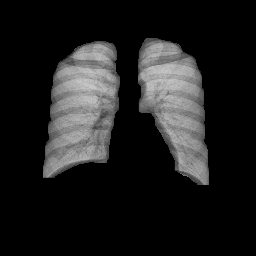

In [14]:
from PIL import Image

Image.fromarray(images[0].numpy().astype("uint8"))

In [15]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Making a simple sequential model
model = Sequential([
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
])

In [17]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10
14/14 [==============================] - 51s 3s/step - loss: 1.4492 - accuracy: 0.5321 - val_loss: 0.6927 - val_accuracy: 0.5648
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.6901 - accuracy: 0.7431 - val_loss: 0.6910 - val_accuracy: 0.6111
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.6841 - accuracy: 0.7615 - val_loss: 0.6810 - val_accuracy: 0.6852
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.6545 - accuracy: 0.6789 - val_loss: 0.7574 - val_accuracy: 0.4630
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.6265 - accuracy: 0.6445 - val_loss: 0.6009 - val_accuracy: 0.6574
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.6043 - accuracy: 0.6651 - val_loss: 0.5599 - val_accuracy: 0.7222
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.5714 - accuracy: 0.7156 - val_loss: 0.5254 - val_accuracy: 0.7222
Epoch 8/10
14/14 [==

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 134,218,562
Trainable params: 134,218,562
Non-trainable params: 0
_________________________________________________________________


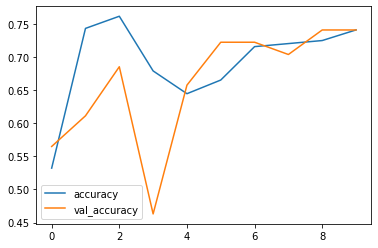

In [20]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()


In [21]:
def train_model(network, epochs=15):
    model = Sequential(network)

    model.compile(optimizer='sgd',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [22]:
# Defining the network and layers in detail
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(classes))
]

history_df, model = train_model(network)

Epoch 1/15
14/14 [==============================] - 27s 2s/step - loss: 0.6730 - accuracy: 0.5688 - val_loss: 0.6405 - val_accuracy: 0.6111
Epoch 2/15
14/14 [==============================] - 26s 2s/step - loss: 0.6263 - accuracy: 0.6491 - val_loss: 0.5754 - val_accuracy: 0.7130
Epoch 3/15
14/14 [==============================] - 26s 2s/step - loss: 0.5981 - accuracy: 0.6835 - val_loss: 0.5460 - val_accuracy: 0.7315
Epoch 4/15
14/14 [==============================] - 27s 2s/step - loss: 0.5860 - accuracy: 0.6995 - val_loss: 0.5370 - val_accuracy: 0.7222
Epoch 5/15
14/14 [==============================] - 26s 2s/step - loss: 0.5759 - accuracy: 0.6995 - val_loss: 0.5292 - val_accuracy: 0.7130
Epoch 6/15
14/14 [==============================] - 26s 2s/step - loss: 0.5661 - accuracy: 0.7087 - val_loss: 0.5172 - val_accuracy: 0.7500
Epoch 7/15
14/14 [==============================] - 26s 2s/step - loss: 0.5562 - accuracy: 0.7133 - val_loss: 0.5102 - val_accuracy: 0.7685
Epoch 8/15
14/14 [==

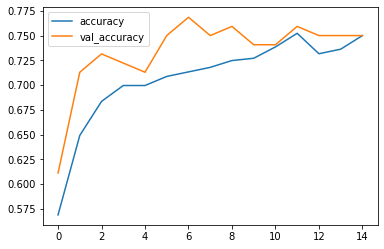

In [23]:
history_df[["accuracy", "val_accuracy"]].plot()

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)       

In [37]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("vertical", seed=1),
      layers.RandomRotation(0.2, seed=1),
    layers.RandomZoom(0.2, seed=1),
  ]
)


full_network = [
    data_augmentation
] + network

history_df, model = train_model(full_network, epochs=40)

Epoch 1/40
14/14 [==============================] - 30s 2s/step - loss: 0.5276 - accuracy: 0.7408 - val_loss: 0.4905 - val_accuracy: 0.7593
Epoch 2/40
14/14 [==============================] - 30s 2s/step - loss: 0.5234 - accuracy: 0.7500 - val_loss: 0.4823 - val_accuracy: 0.7685
Epoch 3/40
14/14 [==============================] - 32s 2s/step - loss: 0.5225 - accuracy: 0.7569 - val_loss: 0.4764 - val_accuracy: 0.7870
Epoch 4/40
14/14 [==============================] - 29s 2s/step - loss: 0.5248 - accuracy: 0.7569 - val_loss: 0.4802 - val_accuracy: 0.7593
Epoch 5/40
14/14 [==============================] - 29s 2s/step - loss: 0.5208 - accuracy: 0.7615 - val_loss: 0.4688 - val_accuracy: 0.7870
Epoch 6/40
14/14 [==============================] - 30s 2s/step - loss: 0.5201 - accuracy: 0.7431 - val_loss: 0.4721 - val_accuracy: 0.7870
Epoch 7/40
14/14 [==============================] - 29s 2s/step - loss: 0.5313 - accuracy: 0.7454 - val_loss: 0.4755 - val_accuracy: 0.7870
Epoch 8/40
14/14 [==

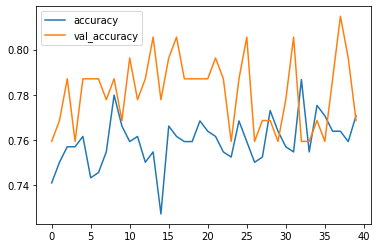

In [39]:
history_df[["accuracy", "val_accuracy"]].plot()

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [41]:
preds = model.predict(test)

4/4 [==============================] - 2s 385ms/step


In [42]:
import numpy as np
predicted_class = np.argmax(preds, axis=1)

In [43]:
actual_labels = np.concatenate([y for x, y in test], axis=0)

In [44]:
import itertools

actual_image = [x.numpy().astype("uint8") for x, y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [45]:
actual_class = np.argmax(actual_labels, axis=1)

In [46]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])

In [47]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: classes[x])
pred_df["actual"] = pred_df["actual"].apply(lambda x: classes[x])

In [48]:
import base64
import io

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})

In [51]:
from sklearn import metrics
# Predicted values
y_pred = pred_df["prediction"]
# Actual values
y_act = pred_df["actual"]
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=["normal", "ptb"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=["normal", "ptb"]))

[[46 12]
 [13 37]]
              precision    recall  f1-score   support

      normal       0.78      0.79      0.79        58
         ptb       0.76      0.74      0.75        50

    accuracy                           0.77       108
   macro avg       0.77      0.77      0.77       108
weighted avg       0.77      0.77      0.77       108

